# Atahar Imtiaz

## Research question/interests

Briefly describe your research question or interests here.

**My accountability would be for the relation between A and xA, how both of these sets of data correlate to each other.** xA stands for the Expected Assists that a player is supposed to have earned throughout the season whereas A is the total number of assists the player has earned. By analyzing these 2 stats and finding a correlation we understand a player's playmaking efficiency.


## Legend

**Football jargon:**

xG = Expected Goals

xA= Expected Assists

G = Actual Goals

A = Actual Assists

xA - A = Difference between Expected Assists and Assists

**Statistics:** 

MSE = Mean Squared Error deviation

RMSE = Root Mean Squared Error deviation

In [67]:
import pandas as pd 
df = (pd.read_csv('../data/processed/Premier_League_players.xlsx.csv')
      .dropna()
      .reset_index(drop=True)
     ) 
df.head(10)

,№,Player,Team,Apps,Min,G,A,xG,G - xG,xA,xA - A,xG90,xA90
0,1,Son Heung-Min,Tottenham,35,3051,23,7,16.99,6.01,7.85,-0.85,0.50,0.23
1,2,Mohamed Salah,Liverpool,35,2757,23,13,24.36,-1.36,9.79,3.21,0.80,0.32
2,3,Cristiano Ronaldo,Manchester United,30,2468,18,3,17.21,0.79,4.42,-1.42,0.63,0.16
3,4,Harry Kane,Tottenham,37,3229,17,9,20.69,-3.69,9.82,-0.82,0.58,0.27
4,5,Sadio Mané,Liverpool,34,2833,16,2,16.83,-0.83,5.27,-3.27,0.53,0.17
5,6,Kevin De-Bruyne,Manchester City,30,2214,15,8,5.95,9.05,11.26,-3.26,0.24,0.46
6,7,Jamie Vardy,Leicester,25,1807,15,2,9.99,5.01,1.61,0.39,0.50,0.08
7,8,Diogo Jota,Liverpool,35,2401,15,4,17.35,-2.35,5.87,-1.87,0.65,0.22
8,9,Wilfried Zaha,Crystal Palace,33,2762,14,1,10.18,3.82,4.89,-3.89,0.33,0.16
9,10,Raheem Sterling,Manchester City,30,2119,13,5,15.78,-2.78,5.02,-0.02,0.67,0.21


In [68]:
df.shape


(537, 13)

In [69]:
df = (
    df
    .drop(['№', 'Apps','Min', 'G', 'xG', 'G - xG', 'xG90', 'xA90'], axis=1)
    .reset_index(drop=True)
)
df.head(10)

,Player,Team,A,xA,xA - A
0,Son Heung-Min,Tottenham,7,7.85,-0.85
1,Mohamed Salah,Liverpool,13,9.79,3.21
2,Cristiano Ronaldo,Manchester United,3,4.42,-1.42
3,Harry Kane,Tottenham,9,9.82,-0.82
4,Sadio Mané,Liverpool,2,5.27,-3.27
5,Kevin De-Bruyne,Manchester City,8,11.26,-3.26
6,Jamie Vardy,Leicester,2,1.61,0.39
7,Diogo Jota,Liverpool,4,5.87,-1.87
8,Wilfried Zaha,Crystal Palace,1,4.89,-3.89
9,Raheem Sterling,Manchester City,5,5.02,-0.02


In [70]:
df.shape

(537, 5)

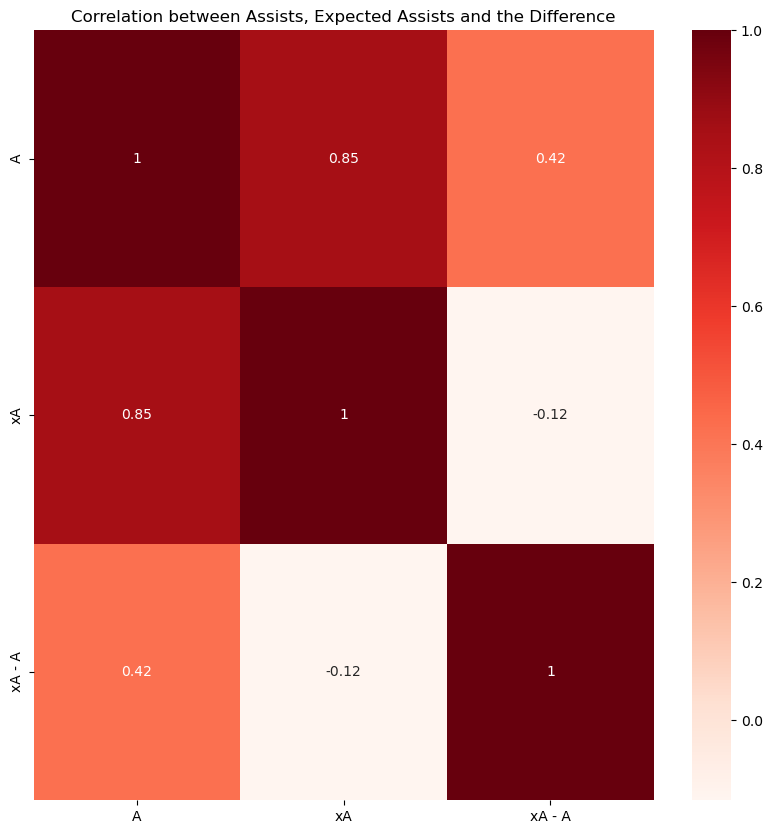

In [71]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(df2, annot=True, cmap=plt.cm.Reds)
plt.title('Correlation between Assists, Expected Assists and the Difference')
plt.show()


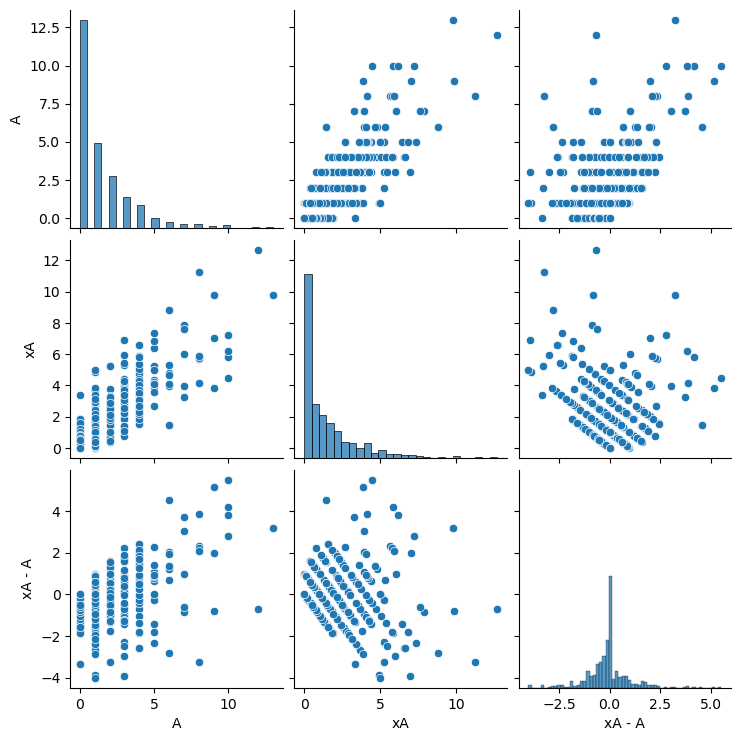

In [72]:
sns.pairplot(df)

In [73]:
df.isna()

,Player,Team,A,xA,xA - A
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
532,False,False,False,False,False
533,False,False,False,False,False
534,False,False,False,False,False
535,False,False,False,False,False


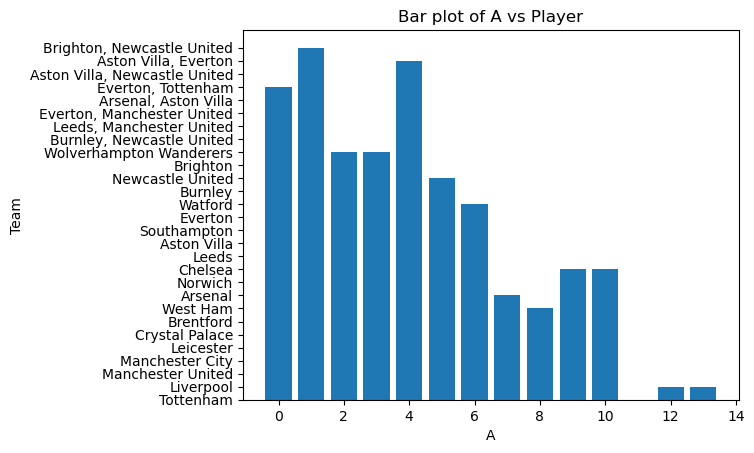

In [74]:
plt.bar(df['A'], df['Team'])

plt.xlabel('A')
plt.ylabel('Team')
plt.title('Bar plot of A vs Player')

plt.show()

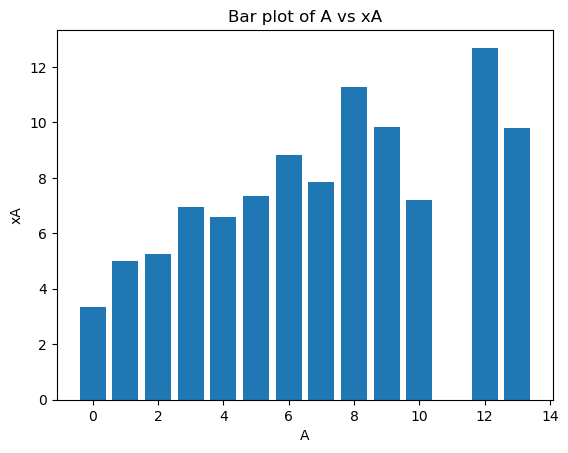

In [75]:
plt.bar(df['A'], df['xA'])

plt.xlabel('A')
plt.ylabel('xA')
plt.title('Bar plot of A vs xA')

plt.show()

In [76]:
df = df.sort_values('A', ascending=False).reset_index(drop=True)

In [77]:
print(df['A'])

0      13
1      12
2      10
3      10
4      10
       ..
532     0
533     0
534     0
535     0
536     0
Name: A, Length: 537, dtype: int64


In [92]:
df = df[['Player', 'A', 'xA', 'xA - A']]
df2 = df.iloc[:10, :]
df2 = df2.reset_index(drop=True)

In [106]:
print(df2)

                   Player   A     xA  xA - A
0           Mohamed Salah  13   9.79    3.21
1  Trent Alexander-Arnold  12  12.69   -0.69
2             Mason Mount  10   7.21    2.79
3           Harvey Barnes  10   4.48    5.52
4        Andrew Robertson  10   6.20    3.80
5            Jarrod Bowen  10   5.82    4.18
6             Reece James   9   7.03    1.97
7              Paul Pogba   9   3.84    5.16
8              Harry Kane   9   9.82   -0.82
9         Michail Antonio   8   5.77    2.23


<AxesSubplot:xlabel='xA', ylabel='count'>

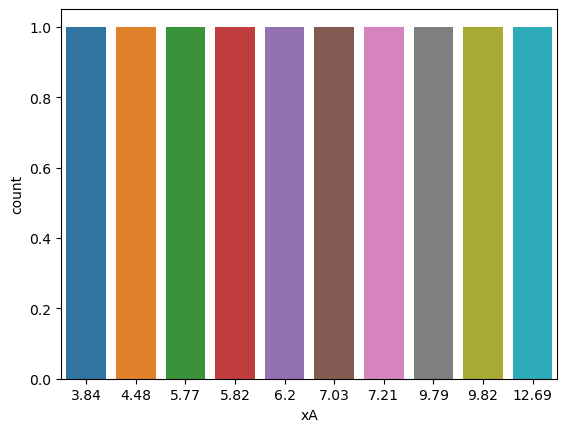

In [107]:
sns.countplot(x=df2["xA"])

<AxesSubplot:xlabel='count', ylabel='A'>

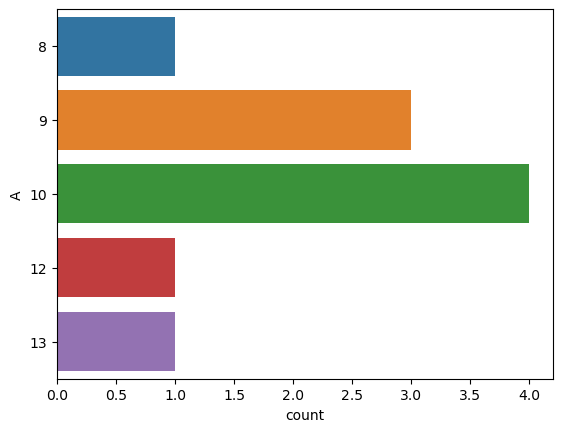

In [108]:
sns.countplot(y=df2["A"])

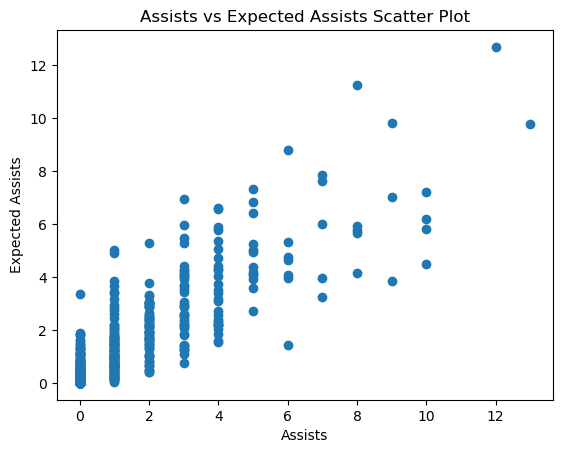

In [109]:
import matplotlib.pyplot as plt

x = df['A']
y = df['xA']

plt.scatter(x, y)

plt.xlabel('Assists')
plt.ylabel('Expected Assists')

plt.title('Assists vs Expected Assists Scatter Plot')

plt.show()

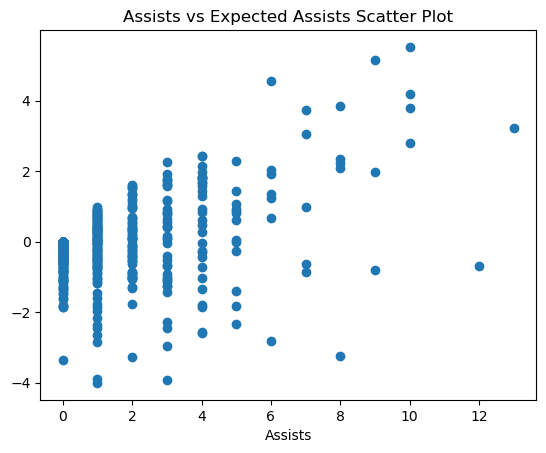

In [110]:
import matplotlib.pyplot as plt

x = df['A']
y = df['xA - A']

plt.scatter(x, y)

plt.xlabel('Assists')
plt.ylabel('')

plt.title('Assists vs Expected Assists Scatter Plot')

plt.show()

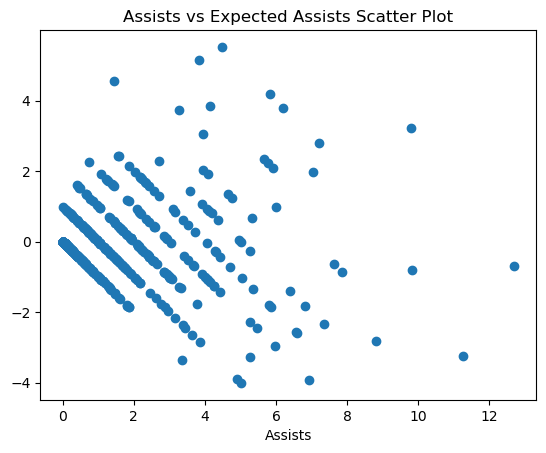

In [111]:
import matplotlib.pyplot as plt

x = df['xA']
y = df['xA - A']

plt.scatter(x, y)

plt.xlabel('Assists')
plt.ylabel('')

plt.title('Assists vs Expected Assists Scatter Plot')

plt.show()

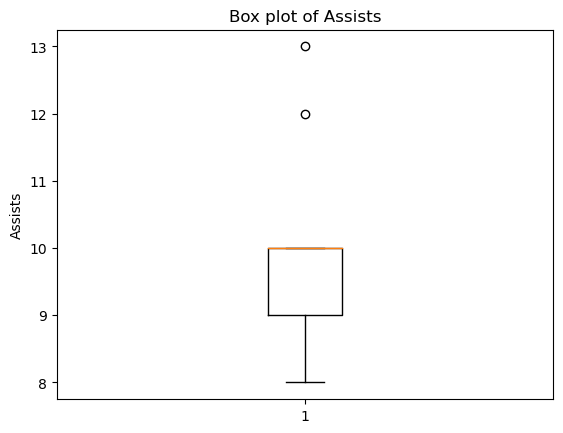

In [112]:
data = df2['A']

plt.boxplot(data)

plt.ylabel('Assists')

plt.title('Box plot of Assists')

plt.show()

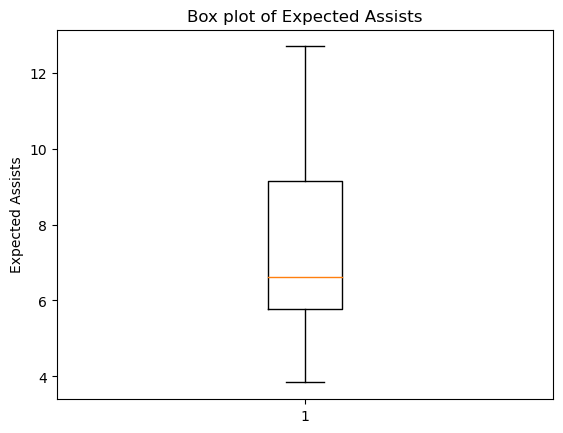

In [113]:
data = df2['xA']

plt.boxplot(data)

plt.ylabel('Expected Assists')

plt.title('Box plot of Expected Assists')

plt.show()

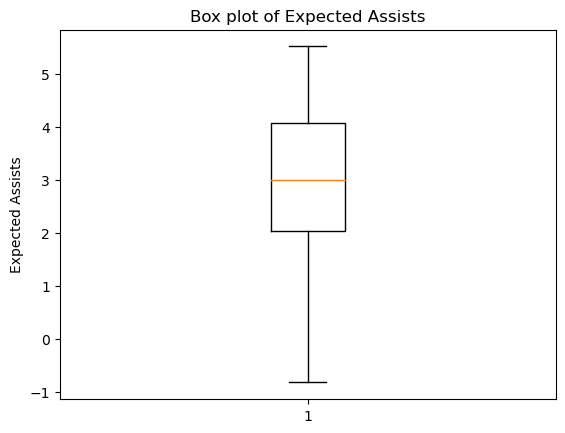

In [114]:
data = df2['xA - A']

plt.boxplot(data)

plt.ylabel('Expected Assists')

plt.title('Box plot of Expected Assists')

plt.show()

<AxesSubplot:xlabel='count', ylabel='A'>

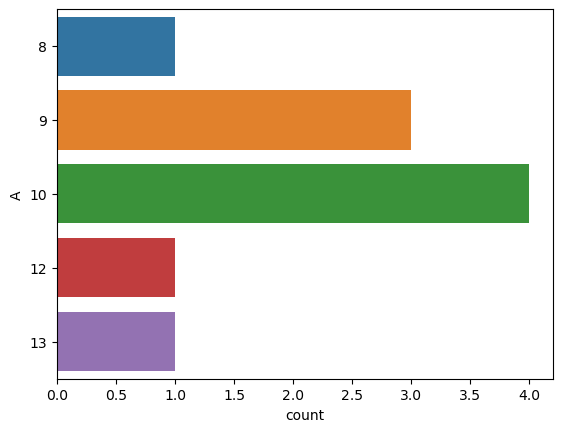

In [115]:
sns.countplot(y=df2["A"])

<AxesSubplot:xlabel='count', ylabel='xA'>

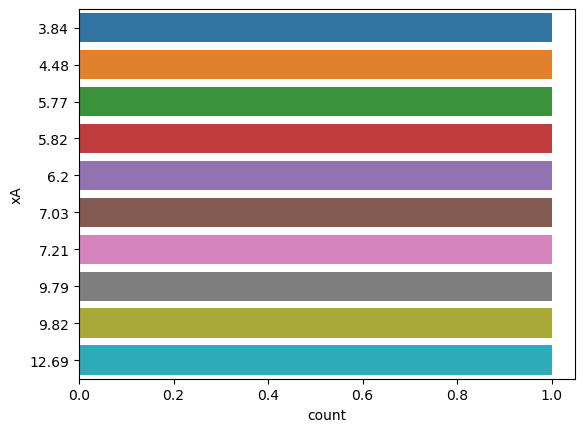

In [116]:
sns.countplot(y=df2["xA"])

<AxesSubplot:xlabel='count', ylabel='xA - A'>

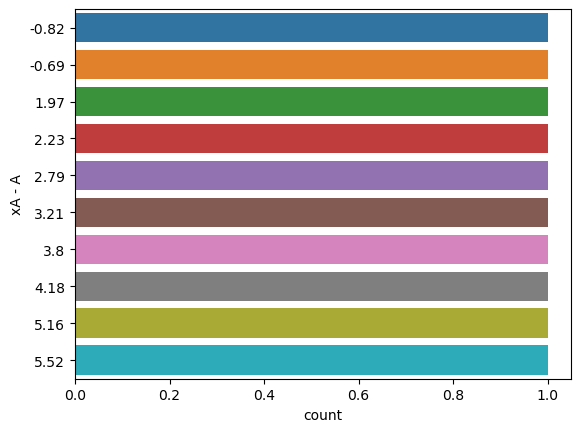

In [117]:
sns.countplot(y=df2["xA - A"])

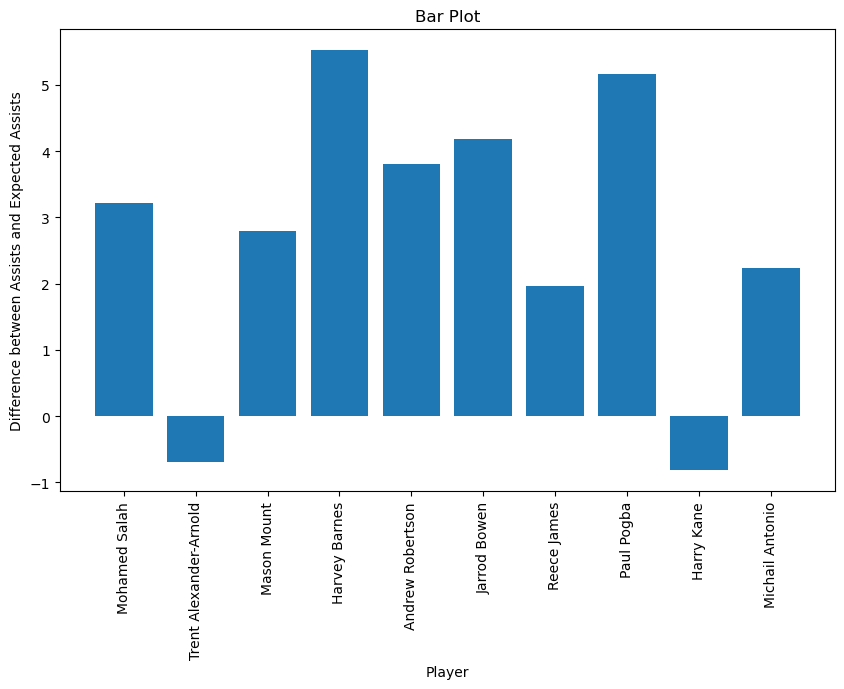

In [118]:
import matplotlib.pyplot as plt

x = df2['Player']
y = df2['xA - A']

plt.figure(figsize=(10,6)) # Increase figure size to 10 inches by 6 inches
plt.bar(x, y)
plt.xlabel('Player', fontsize=10) # Decrease font size to 10
plt.xticks(rotation=90) # Rotate x-axis labels by 90 degrees for better readability
plt.ylabel('Difference between Assists and Expected Assists', fontsize=10) # Decrease font size to 10
plt.title('Bar Plot', fontsize=12) # Increase font size to 12 for title
plt.show()